# TASK-1:
## **House Price Prediction :**

**Develop a machine learning model for
predicting house prices using Python,
scikit-learn, and TensorFlow.**

# Model:1



Saving kaggle.json to kaggle (4).json
Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  california-housing-prices.zip
  inflating: housing.csv             
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0 

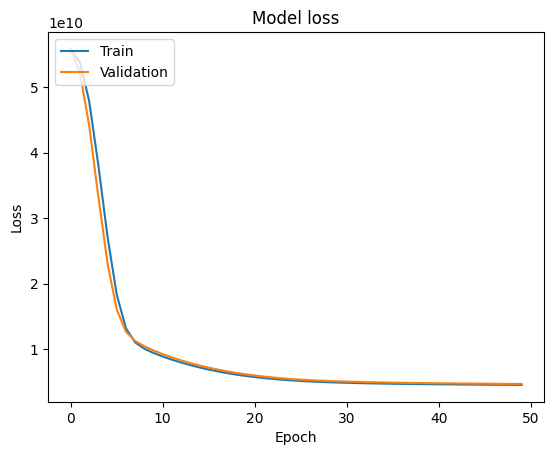

In [ ]:
# Step 1: Install and set up Kaggle API
!pip install -q kaggle

# Upload your kaggle.json file
from google.colab import files
files.upload()

# Create a directory for Kaggle and move the kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using Kaggle API
!kaggle datasets download -d camnugent/california-housing-prices

# Unzip the dataset
!unzip -o california-housing-prices.zip

# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 3: Load the dataset
data = pd.read_csv('housing.csv')

# Step 4: Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

# Step 5: Handle missing values
data = data.dropna()

# Step 6: Encode categorical variables
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Step 7: Split the dataset into features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 10: Build the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 11: Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Step 12: Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Display predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(predictions.head())

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Model:2

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 83.5MB/s]
Archive:  california-housing-prices.zip
  inflating: housing.csv             
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0    

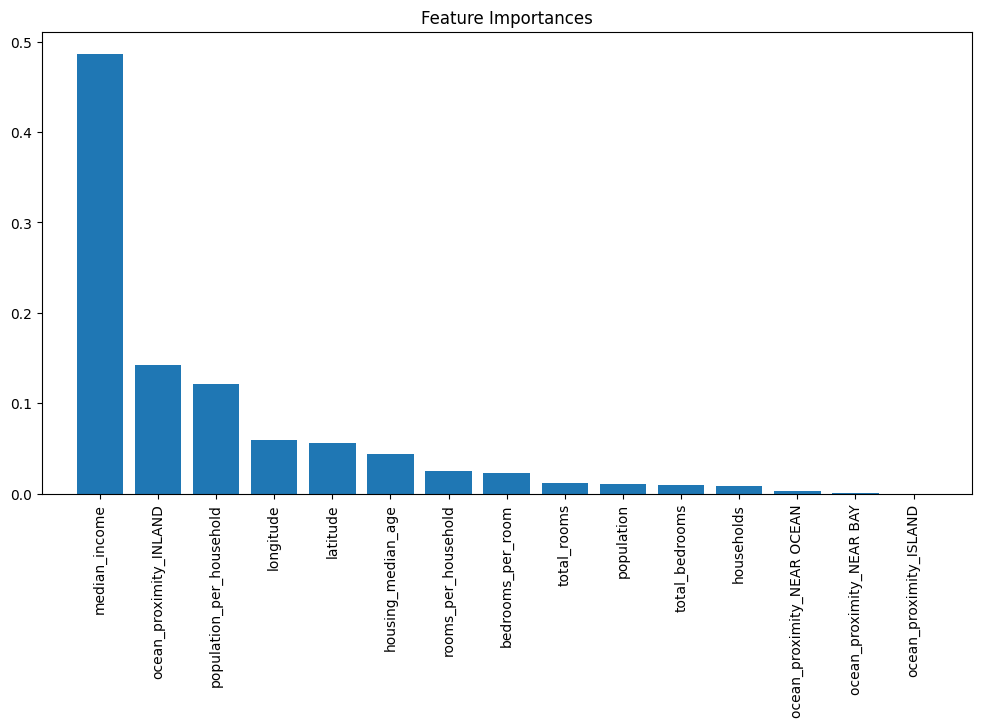

In [ ]:
# Step 1: Install and set up Kaggle API
!pip install -q kaggle

# Upload your kaggle.json file
from google.colab import files
files.upload()

# Create a directory for Kaggle and move the kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using Kaggle API
!kaggle datasets download -d camnugent/california-housing-prices

# Unzip the dataset
!unzip -o california-housing-prices.zip

# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Step 3: Load the dataset
data = pd.read_csv('housing.csv')

# Step 4: Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

# Step 5: Handle missing values
data = data.dropna()

# Step 6: Encode categorical variables
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Step 7: Feature Engineering
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Step 8: Split the dataset into features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Step 9: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 11: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

# Use n_jobs=1 to avoid conflicts with multithreading
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

# Step 12: Evaluate the model
y_pred = best_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Display predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(predictions.head())

# Plot feature importances
importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()



# **Explanation for Model-2:**

## Purpose of the Code
The goal of this code is to develop a machine learning model for predicting house prices using Python, scikit-learn, and TensorFlow. The model utilizes the RandomForestRegressor algorithm and employs hyperparameter tuning to optimize its performance. The dataset used is the California Housing Prices dataset.

## Technologies and Libraries Used
*  **Python:** Programming language.

*  **Kaggle API:** Used to download the dataset
directly from Kaggle.

*  **pandas:** For data manipulation and analysis.

* **numpy:** For numerical operations.

* **matplotlib and seaborn:** For data visualization.

* **scikit-learn:** For machine learning, including preprocessing, model building, and evaluation.

* **Google Colab:** An online platform to run Python code with a Jupyter notebook interface.

## Detailed Explanation of Each Step

**Step 1:** Install and Set Up Kaggle API

1. Install Kaggle API:

**Code:**
```
!pip install -q kaggle
```
This command installs the Kaggle API, which allows for easy interaction with Kaggle datasets.

2. Upload kaggle.json:

**Code:**
```
from google.colab import files
files.upload()
```
This block uploads the kaggle.json file containing the API credentials.

3. Move kaggle.json to the Appropriate Directory:

**Code:**
```
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
```
These commands create a directory for Kaggle configurations and move the kaggle.json file there, setting the appropriate permissions.

4. Download and Unzip the Dataset:

**Code:**
```
!kaggle datasets download -d camnugent/california-housing-prices
!unzip -o california-housing-prices.zip
```
The dataset is downloaded from Kaggle and unzipped for use.

**Step 2:** Import Necessary Libraries

**Code:**
```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
```
This step imports all the necessary libraries for data manipulation, visualization, and building the machine learning model.

**Step 3:** Load the Dataset

**Code:**
```
data = pd.read_csv('housing.csv')
```
The dataset is loaded into a pandas DataFrame for easy manipulation and analysis.

**Step 4:** Explore the Dataset

**Code:**
```
print(data.head())
print(data.info())
print(data.describe())
```
These commands provide a quick overview of the dataset, including the first few rows, data types, and summary statistics.

**Step 5:** Handle Missing Values

**Code:**
```
data = data.dropna()
```
This step removes any rows with missing values to ensure the dataset is clean.

**Step 6:** Encode Categorical Variables

**Code:**
```
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
```
Categorical variables are converted into numerical values using one-hot encoding, which is necessary for most machine learning algorithms.

**Step 7:** Feature Engineering

**Code:**
```
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']
```

New features are created to potentially provide more information to the model and improve its performance.

**Step 8:** Split the Dataset into Features and Target

**Code:**
```
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
```
The dataset is split into features (X) and the target variable (y), which is the house prices.

**Step 9:** Split the Data into Training and Testing Sets

**Code:**
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
The data is further split into training and testing sets to evaluate the model's performance on unseen data.

**Step 10:** Standardize the Features

**Code:**
```
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```
The features are standardized to have a mean of 0 and a standard deviation of 1, which is essential for many machine learning algorithms to perform well.

**Step 11:** Hyperparameter Tuning with GridSearchCV

1. Define Parameter Grid:

**Code**:
```
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
```
This grid defines the hyperparameters to be tested during the tuning process.

2. Initialize and Fit GridSearchCV:

**Code:**
```
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
```
GridSearchCV is used to find the best combination of hyperparameters. It performs cross-validation and evaluates different parameter combinations.

3. Retrieve Best Estimator:

**Code:**
```
best_rf = grid_search.best_estimator_
```
The best model found during the grid search is stored in best_rf.

**Step 12:** Evaluate the Model

1. Make Predictions:

**Code:**
```
y_pred = best_rf.predict(X_test_scaled)
```
The model makes predictions on the test set.

2. Calculate and Print Evaluation Metrics:

**Code:**
```
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
```
Various evaluation metrics are calculated and printed to assess the model's performance.

3. Display Predictions:

**Code:**
```
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(predictions.head())
```
A sample of the actual vs. predicted house prices is displayed.

4. Plot Feature Importances:

**Code:**
```
importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
```
The importance of each feature is plotted, showing which features contribute the most to the model's predictions.

## Conclusion
This detailed breakdown walks through each step of the code, explaining the purpose and logic behind the actions taken. The use of various libraries and tools is aimed at building a robust machine learning model to predict house prices, leveraging techniques like data preprocessing, feature engineering, and hyperparameter tuning to enhance performance.